<a id='top'></a>
# Process/Analyze Data in Python and Pandas
1. <a href='#section1'>Pandas Basics</a>
2. <a href='#section2'>Data Manipulation - Grouping</a>
3. <a href='#section3'>Data Manipulation - Statistical Computations</a>
4. <a href='#section4'>Data Manipulation - Matrix Operations on DataFrames</a>
5. <a href='#section6'>Back/Forwarding Fill</a>
6. <a href='#section5'>Quickly Load Financial Data</a>
7. <a href='#section7'>Advanced Indexing: MultiIndex</a>

In [1]:
########################
# IMPORT PACKAGES HERE #
########################
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # numpy goes hand-in-hand with pandas
import pandas_datareader.data as pdr

<a id="section1"></a>
## Pandas Basics
### Data Strucures
* Series
    * One-dimensional
    * each element is associated with a (numeric/non-numeric) index
* DataFrame
    * Two-dimensional
    * think it as a relational db table (rows and columns)
    * Accepts Series and other DataFrame as input 

In [2]:
# empty series
pd.Series()

Series([], dtype: float64)

In [3]:
# create series with a python dict
pd.Series({
    'foo': 0,
    'bar': 1
})

bar    1
foo    0
dtype: int64

In [4]:
# create series with default index
pd.Series([0, 1, 2])

0    0
1    1
2    2
dtype: int64

In [5]:
# create series with default index
pd.Series([0, 1, 2], index=['a', 'b', 'c'])

a    0
b    1
c    2
dtype: int64

In [6]:
# create series with a numpy array
pd.Series(np.random.randn(10))

0    0.697049
1    0.155332
2   -0.067073
3   -1.521581
4   -0.140835
5    0.309991
6    0.766793
7   -0.136772
8   -0.998741
9   -0.964021
dtype: float64

In [7]:
# scaling one value across index
pd.Series(0.99, index=['a', 'b', 'c'])

a    0.99
b    0.99
c    0.99
dtype: float64

In [8]:
# access series 
s = pd.Series(np.random.randn(3), index=['a', 'b', 'c'])
s

a   -0.817703
b    0.940499
c   -0.005756
dtype: float64

In [9]:
s[-2] # positional

0.94049864661512073

In [10]:
s[[0,2]] # multi-select

a   -0.817703
c   -0.005756
dtype: float64

In [11]:
s['b'] # key-value

0.94049864661512073

In [12]:
s[['a', 'b']] # multi-select

a   -0.817703
b    0.940499
dtype: float64

In [13]:
s[ s > 0 ] # conditional select

b    0.940499
dtype: float64

In [14]:
# simple computations
s + s

a   -1.635405
b    1.880997
c   -0.011512
dtype: float64

In [15]:
# computations of two different series. automatically maps to index
s1 = pd.Series([1,2,3])
s2 = pd.Series([2,1])
s1 + s2

0    3.0
1    3.0
2    NaN
dtype: float64

In [16]:
# dataframe from a dict
pd.DataFrame({
    'col1': [1,2,3],
    'col2': [4,5,6],
    'col3': [7,8,9]
})

,col1,col2,col3
0,1,4,7
1,2,5,8
2,3,6,9


In [17]:
# dataframe from list of dicts
pd.DataFrame([
    {'col1': 0, 'col2': 1, 'col3': 2},
    {'col1': 3, 'col2': 4, 'col3': 5},
])

,col1,col2,col3
0,0,1,2
1,3,4,5


In [18]:
# dataframe from series with column labels
pd.DataFrame({
    'col1': pd.Series([1,2,3]),
    'col2': pd.Series([4,5,6])
})

,col1,col2
0,1,4
1,2,5
2,3,6


In [19]:
# dataframe with custom index (row label) and column labels
d = pd.DataFrame(
    np.identity(3), 
    index=['row' + str(i) for i in range(3)], 
    columns=['col' + str(i) for i in range(3)]
)
d

,col0,col1,col2
row0,1.0,0.0,0.0
row1,0.0,1.0,0.0
row2,0.0,0.0,1.0


In [20]:
# access dataframe
# select column of data
d['col1']

row0    0.0
row1    1.0
row2    0.0
Name: col1, dtype: float64

In [21]:
# select row of data by label
d.loc['row1']

col0    0.0
col1    1.0
col2    0.0
Name: row1, dtype: float64

In [22]:
# select row of data by integer index
d.iloc[0]

col0    1.0
col1    0.0
col2    0.0
Name: row0, dtype: float64

In [23]:
# simple computation
d + d

,col0,col1,col2
row0,2.0,0.0,0.0
row1,0.0,2.0,0.0
row2,0.0,0.0,2.0


In [24]:
d - d.iloc[0] # data align by cols

,col0,col1,col2
row0,0.0,0.0,0.0
row1,-1.0,1.0,0.0
row2,-1.0,0.0,1.0


In [25]:
d.columns # show column labels

Index(['col0', 'col1', 'col2'], dtype='object')

In [26]:
d.index # show row index

Index(['row0', 'row1', 'row2'], dtype='object')

### Read CSV Data

In [27]:
# headless data - add column labels
df = pd.read_csv('datasets/1coinUSD.csv', names=['time_stamp', 'price', 'volumn'])
len(df)

764732

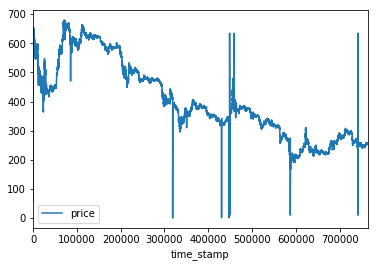

In [28]:
# plotting
df['time_stamp'] =  pd.Series(list(range(len(df))))
df.plot(x='time_stamp', y='price')
plt.show()

In [29]:
# invalidate data entries
df['weird_col'] = np.nan
# Problematic! NaNs are excluded when grouping
df.head()

,time_stamp,price,volumn,weird_col
0,0,621.0,0.01,NaN
1,1,620.0,0.01,NaN
2,2,620.0,0.01,NaN
3,3,620.5,0.01,NaN
4,4,621.0,0.01,NaN


In [30]:
np.isnan(df).tail() # validation

,time_stamp,price,volumn,weird_col
764727,False,False,False,True
764728,False,False,False,True
764729,False,False,False,True
764730,False,False,False,True
764731,False,False,False,True


In [31]:
df.fillna(0).tail() # fill NaN data with a valid value

,time_stamp,price,volumn,weird_col
764727,764727,253.8,0.02,0.0
764728,764728,253.6,0.07,0.0
764729,764729,253.6,0.20,0.0
764730,764730,253.8,0.30,0.0
764731,764731,253.8,0.33,0.0


<a id="section2"></a>
## Data Manipulation - Grouping

In [32]:
# load the FMA music datasets
df = pd.read_csv('datasets/music_track_info.csv')
df.head()

,track_id,album_id,album_title,album_url,artist_id,artist_name,artist_url,artist_website,license_image_file,license_image_file_large,...,track_information,track_instrumental,track_interest,track_language_code,track_listens,track_lyricist,track_number,track_publisher,track_title,track_url
0,2,1.0,AWOL - A Way Of Life,http://freemusicarchive.org/music/AWOL/AWOL_-_...,1,AWOL,http://freemusicarchive.org/music/AWOL/,http://www.AzillionRecords.blogspot.com,http://i.creativecommons.org/l/by-nc-sa/3.0/us...,http://fma-files.s3.amazonaws.com/resources/im...,...,NaN,0,4656,en,1293,NaN,3,NaN,Food,http://freemusicarchive.org/music/AWOL/AWOL_-_...
1,3,1.0,AWOL - A Way Of Life,http://freemusicarchive.org/music/AWOL/AWOL_-_...,1,AWOL,http://freemusicarchive.org/music/AWOL/,http://www.AzillionRecords.blogspot.com,http://i.creativecommons.org/l/by-nc-sa/3.0/us...,http://fma-files.s3.amazonaws.com/resources/im...,...,NaN,0,1470,en,514,NaN,4,NaN,Electric Ave,http://freemusicarchive.org/music/AWOL/AWOL_-_...
2,5,1.0,AWOL - A Way Of Life,http://freemusicarchive.org/music/AWOL/AWOL_-_...,1,AWOL,http://freemusicarchive.org/music/AWOL/,http://www.AzillionRecords.blogspot.com,http://i.creativecommons.org/l/by-nc-sa/3.0/us...,http://fma-files.s3.amazonaws.com/resources/im...,...,NaN,0,1933,en,1151,NaN,6,NaN,This World,http://freemusicarchive.org/music/AWOL/AWOL_-_...
3,10,6.0,Constant Hitmaker,http://freemusicarchive.org/music/Kurt_Vile/Co...,6,Kurt Vile,http://freemusicarchive.org/music/Kurt_Vile/,http://kurtvile.com,http://i.creativecommons.org/l/by-nc-nd/3.0/88...,http://fma-files.s3.amazonaws.com/resources/im...,...,NaN,0,54881,en,50135,NaN,1,NaN,Freeway,http://freemusicarchive.org/music/Kurt_Vile/Co...
4,20,4.0,Niris,http://freemusicarchive.org/music/Chris_and_Ni...,4,Nicky Cook,http://freemusicarchive.org/music/Chris_and_Ni...,NaN,http://i.creativecommons.org/l/by-nc-nd/3.0/88...,http://fma-files.s3.amazonaws.com/resources/im...,...,NaN,0,978,en,361,NaN,3,NaN,Spiritual Level,http://freemusicarchive.org/music/Chris_and_Ni...


In [33]:
# group by artist
df_grouped = df.groupby(['artist_name', 'album_url'])
df_grouped.count()

track_id  \
artist_name                               album_url                                                      
AWOL                                      http://freemusicarchive.org/music/AWOL/AWOL_-_A...         4   
Abominog                                  http://freemusicarchive.org/music/Abominog/mp3_...         2   
Airway                                    http://freemusicarchive.org/music/Airway/Live_a...         2   
Alec K. Redfearn & the Eyesores           http://freemusicarchive.org/music/Alec_K_Redfea...         2   
                                          http://freemusicarchive.org/music/Alec_K_Redfea...         1   
                                          http://freemusicarchive.org/music/Alec_K_Redfea...         1   
Amoebic Ensemble                          http://freemusicarchive.org/music/Amoebic_Ensem...         2   
                                          http://freemusicarchive.org/music/Amoebic_Ensem...         2   
Andy Hayleck                              http://freemusicarchive.org/music/Andy_Hayleck/...         2   
Animal Writes                             http://freemusicarchive.org/music/Animal_Writes...         2   
Arc and Sender                            http://freemusicarchive.org/music/Arc_and_Sende...         2   
                                          http://freemusicarchive.org/music/Arc_and_Sende...         1   
Area C                                    http://freemusicarchive.org/music/Area_C/Thee_H...        13   
Argumentix                                http://freemusicarchive.org/music/Argumentix/Bo...         4   
                                          http://freemusicarchive.org/music/Argumentix/Dr...         1   
                                          http://freemusicarchive.org/music/Argumentix/He...         1   
                                          http://freemusicarchive.org/music/Argumentix/Ni...         2   
                                          http://freemusicarchive.org/music/Argumentix/Ta...         1   
                                          http://freemusicarchive.org/music/Argumentix/Vi...         2   
Argumentix + Dragging an Ox Through Water http://freemusicarchive.org/music/Argumentix__D...         1   
Ariel Pink's Haunted Graffiti             http://freemusicarchive.org/music/Ariel_Pinks_H...         1   
                                          http://freemusicarchive.org/music/Ariel_Pinks_H...         1   
                                          http://freemusicarchive.org/music/Ariel_Pinks_H...         1   
                                          http://freemusicarchive.org/music/Ariel_Pinks_H...         1   
                                          http://freemusicarchive.org/music/Ariel_Pinks_H...         1   
Au                                        http://freemusicarchive.org/music/Au/Au/                   1   
Bad News Bats                             http://freemusicarchive.org/music/Bad_News_Bats...         2   
Banana Clipz                              http://freemusicarchive.org/music/Banana_Clipz/...         1   
Barnacled                                 http://freemusicarchive.org/music/Barnacled/6/             2   
Bird Names                                http://freemusicarchive.org/music/Bird_Names/On...         4   
...                                                                                                ...   
Mike Rep and the Quotas                   http://freemusicarchive.org/music/Mike_Rep_and_...         2   
                                          http://freemusicarchive.org/music/Mike_Rep_and_...         2   
Mincemeat or Tenspeed                     http://freemusicarchive.org/music/Mincemeat_or_...         1   
                                          http://freemusicarchive.org/music/Mincemeat_or_...         1   
                                          http://freemusicarchive.org/music/Mincemeat_or_...         1   
Mink Lungs                                http://freemusicarchive.

<a id="section3"></a>
## Data Manipulation - Statistical Computations

In [34]:
df = pd.DataFrame(np.random.randn(5,5))
df

,0,1,2,3,4
0,0.328626,-0.385047,-0.886759,2.045774,-0.879502
1,0.362562,-0.505931,-0.156578,-1.620579,0.629377
2,-1.795550,1.915211,-0.283106,-0.102033,-0.369634
3,1.900610,-2.300468,0.493708,0.717828,-1.299652
4,1.685343,0.623973,-0.645168,-0.530262,1.750565


In [35]:
df.mean()

0    0.496318
1   -0.130452
2   -0.295581
3    0.102145
4   -0.033769
dtype: float64

In [36]:
df.median()

0    0.362562
1   -0.385047
2   -0.283106
3   -0.102033
4   -0.369634
dtype: float64

In [37]:
df.std()

0    1.473472
1    1.554724
2    0.527768
3    1.375333
4    1.230258
dtype: float64

In [38]:
s1 = pd.Series(np.random.randn(10))
# s1.cov(s1)
s1.cov(s1)

0.74179284451062322

In [39]:
s2 = pd.Series(np.random.randn(10))
s2

0   -1.020174
1   -0.029150
2   -0.880282
3   -1.363447
4    1.613212
5   -0.429769
6   -0.862573
7    0.084047
8    1.000408
9   -0.896264
dtype: float64

In [40]:
s1.cov(s2)

-0.25561340765813889

In [41]:
s1.corr(s2)

-0.31011778882390661

<a id="section4"></a>
## Data Manipulation - Matrix Operations on DataFrames

In [42]:
# cartesian product review
s1 = pd.Series(np.random.randn(3))
s2 = pd.Series(np.random.randn(3))
print(s1)
print(s2)

0   -0.863901
1   -0.623351
2    1.848456
dtype: float64
0   -0.917300
1    0.287902
2   -0.979062
dtype: float64


In [43]:
c_product = [(i1, i2) for i1 in s1 for i2 in s2]
c_product = []
for i1 in s1:
    for i2 in s2:
        c_product.append((s1, s2))
        

In [44]:
# merge two dataframes by joining with key
df1 = pd.DataFrame(np.identity(3))
df1[3] = 99
df2 = pd.DataFrame(np.random.randn(3,3))
df2[3] = 99
print("{}\n{}".format(df1, df2))

     0    1    2   3
0  1.0  0.0  0.0  99
1  0.0  1.0  0.0  99
2  0.0  0.0  1.0  99
          0         1         2   3
0  0.547200  0.422241  0.514779  99
1 -0.784075 -0.558211  0.923254  99
2  0.961276  0.582836 -0.437172  99


In [45]:
pd.merge(df1, df2, how='inner', on=[3])

,0_x,1_x,2_x,3,0_y,1_y,2_y
0,1.0,0.0,0.0,99,0.547200,0.422241,0.514779
1,1.0,0.0,0.0,99,-0.784075,-0.558211,0.923254
2,1.0,0.0,0.0,99,0.961276,0.582836,-0.437172
3,0.0,1.0,0.0,99,0.547200,0.422241,0.514779
4,0.0,1.0,0.0,99,-0.784075,-0.558211,0.923254
5,0.0,1.0,0.0,99,0.961276,0.582836,-0.437172
6,0.0,0.0,1.0,99,0.547200,0.422241,0.514779
7,0.0,0.0,1.0,99,-0.784075,-0.558211,0.923254
8,0.0,0.0,1.0,99,0.961276,0.582836,-0.437172


In [46]:
df1 = pd.DataFrame(np.identity(3))
df2 = df2 = pd.DataFrame(np.random.randn(3,3))
print('{}\n{}'.format(df1, df2))

     0    1    2
0  1.0  0.0  0.0
1  0.0  1.0  0.0
2  0.0  0.0  1.0
          0         1         2
0  0.566802 -1.707603  1.199806
1 -0.125929 -1.424365 -0.231428
2  0.536725  0.358160  1.269075


In [47]:
df1.dot(df2)

,0,1,2
0,0.566802,-1.707603,1.199806
1,-0.125929,-1.424365,-0.231428
2,0.536725,0.358160,1.269075


In [48]:
df1 * df2

,0,1,2
0,0.566802,-0.000000,0.000000
1,-0.000000,-1.424365,-0.000000
2,0.000000,0.000000,1.269075


<a id="section6"></a>
## Back/Forward Fill

In [56]:
# data interlaced with nans
df_with_nans = pd.DataFrame(np.random.randn(3,3))
np.fill_diagonal(df_with_nans.values, np.nan)
df_with_nans

,0,1,2
0,NaN,0.903997,0.205834
1,0.030065,NaN,0.563409
2,0.772093,-0.636859,NaN


In [57]:
# back fill
df_with_nans.fillna(method='bfill')

,0,1,2
0,0.030065,0.903997,0.205834
1,0.030065,-0.636859,0.563409
2,0.772093,-0.636859,NaN


In [58]:
# forward fill / padding
df_with_nans.fillna(method='ffill')

,0,1,2
0,NaN,0.903997,0.205834
1,0.030065,0.903997,0.563409
2,0.772093,-0.636859,0.563409


<a id="section5"></a>
## Quickly Load Financial Data

In [49]:
# historical stock data
df = pdr.DataReader([
    'AMZN',
    'GOOG',
    'MSFT',
    'BLK',
    'AAPL'
],data_source='yahoo',start='01/01/2005')['Adj Close']
df.head()

,AAPL,AMZN,BLK,GOOG,MSFT
Date,,,,,
2018-03-29,167.779999,1447.339966,541.719971,1031.790039,91.269997
2018-03-28,166.479996,1431.420044,528.030029,1004.559998,89.389999
2018-03-27,168.339996,1497.050049,532.109985,1005.099976,89.470001
2018-03-26,172.770004,1555.859985,540.719971,1053.209961,93.779999
2018-03-23,164.940002,1495.560059,521.130005,1021.570007,87.180000


In [50]:
# daily returns
df.pct_change().head()

,AAPL,AMZN,BLK,GOOG,MSFT
Date,,,,,
2018-03-29,NaN,NaN,NaN,NaN,NaN
2018-03-28,-0.007748,-0.010999,-0.025271,-0.026391,-0.020598
2018-03-27,0.011173,0.045850,0.007727,0.000538,0.000895
2018-03-26,0.026316,0.039284,0.016181,0.047866,0.048173
2018-03-23,-0.045320,-0.038757,-0.036229,-0.030041,-0.070377


In [59]:
df = pd.read_json('https://www.blackrock.com/tools/hackathon/portfolio-analysis?betaPortfolios=SNP500&calculateExposures=true&calculatePerformance=true&positions=AAPL~25%7CITOT~25%7CAGG~25%7CEFAV~25%7C&riskFreeRatePortfolio=LTBILL1-3M')
df.head()

,@type,allDataReturned,bmsRequestTime,requestId,requestTime,resultLength,resultMap,serverNumber,success,timerLogs,totalRequestTime
PORTFOLIOS,ToolsResultBeans,True,179,DTTS-time-20180331_03-35-51_622_env-BLKDMZ_hke...,197,425655,"[{'@type': '_bws.portfolio.Portfolios', 'portf...",1,True,NaN,376
portfolios.portfolios,ToolsResultBeans,True,179,DTTS-time-20180331_03-35-51_622_env-BLKDMZ_hke...,197,425655,NaN,1,True,197.0,376
portfolios.portfolios.analytics,ToolsResultBeans,True,179,DTTS-time-20180331_03-35-51_622_env-BLKDMZ_hke...,197,425655,NaN,1,True,0.0,376
portfolios.portfolios.enrichPositions,ToolsResultBeans,True,179,DTTS-time-20180331_03-35-51_622_env-BLKDMZ_hke...,197,425655,NaN,1,True,129.0,376
portfolios.portfolios.enrichPositions.retrieveSecurityData,ToolsResultBeans,True,179,DTTS-time-20180331_03-35-51_622_env-BLKDMZ_hke...,197,425655,NaN,1,True,129.0,376


<a id="section7"></a>
## Hierachical/MultiIndex

Effeciently represents complex/hierachical datasets
* layered index
* flat data series

In [61]:
# construct a 2-layer multi-index
index_2d = [
    ['a', 'b', 'c'], # level 1
    ['x', 'y', 'z'], # level 2
]

multi_index = pd.MultiIndex.from_product(index_2d, names=['level_1', 'level_2'])
multi_index

MultiIndex(levels=[['a', 'b', 'c'], ['x', 'y', 'z']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2], [0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['level_1', 'level_2'])

In [62]:
# fill data into the multi index
multi_index_df = pd.Series(np.random.randn(9), index=multi_index)
multi_index_df

level_1  level_2
a        x         -0.217619
         y         -0.461247
         z          1.641235
b        x         -0.513892
         y         -1.063928
         z          1.080402
c        x         -0.997605
         y          0.680479
         z         -0.713083
dtype: float64

In [67]:
multi_index_df['a', 'x']

-0.21761882711060535

In [68]:
multi_index_df['a']['x']

-0.21761882711060535